In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Golden Section Search

In [ ]:
def goldenSectionSearch(objective,
                        interval,
                        tolerance,
                        maxima=True,
                        max_iterations=10000):
    """
    Implementation for the Golden Section Search Algorithm
    which works for unimodal functions i.e. the functions that
    contain only one local maxima or minima in the given interval

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """

    ####################################
    # WRITE THE CODE FOR THIS FUNCTION #
    ####################################

    u=[]
    l=[]
    w=[]
    optima=[]
    rho = 0.382
    u.append(interval[1])
    l.append(interval[0])
    w.append(u[0]-l[0])
    optima.append((l[-1]+u[-1])/2)
    N = np.floor(np.log(2*tolerance/w[0])/np.log(1-rho))
    l_c = l[0] + rho*w[0]
    u_c = l[0] + (1-rho)*w[0]
    f_l = objective(l_c)
    f_u = objective(u_c)

    N = min(N, max_iterations)
    N = int(N)
    #assuming only minima
    for k in range(1, N+1):
      if (f_u >= f_l and (not maxima)) or (f_l >= f_u and maxima):
        l.append(l[k-1])
        u.append(u_c)
        w.append(u[k]-l[k])
        u_c = l_c
        f_u = f_l
        l_c = l[k] + rho*w[k]
        f_l = objective(l_c)
      else:
        u.append(u[k-1])
        l.append(l_c)
        w.append(u[k]-l[k])
        l_c = u_c
        f_l = f_u
        u_c = l[k] + (1-rho)*w[k]
        f_u = objective(u_c)
      optima.append((l[-1]+u[-1])/2)

    opt = optima[-1]
    optimum = objective(opt)

    # Plotting width vs iteration:

    iterations = range(0, N+1)
    cache={}
    cache["iterations"] = iterations
    cache["width"] = w
    cache["optima"] = optima

    return opt, optimum, cache



### Bisection Search Algorithms

In [ ]:
def bisectionSearch(objective,
                    derivative_objective,
                    interval,
                    tolerance,
                    maxima=True,
                    max_iterations=10000):
    """
    Implementation for the Bisection Search Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    interval : tuple
        The interval in which the function is to be searched for the
        minimum/maxima i.e. (low, high)
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
        i.e. the algorithm will terminate when the length of the interval
        is less than the tolerance
    maxima : bool
        If True, the algorithm will search for the maximum else it will
        search for the minimum
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """

    ####################################
    # WRITE THE CODE FOR THIS FUNCTION #
    ####################################

    u=[]
    l=[]
    w=[]
    optima=[]
    u.append(interval[1])
    l.append(interval[0])
    w.append(u[0]-l[0])
    optima.append((u[-1]+l[-1])/2)
    N = np.floor(np.log(2*tolerance/w[0])/np.log(0.5))

    N = min(N, max_iterations)
    N = int(N)
    for k in range(1, N+1):
      c = (l[k-1]+u[k-1])/2
      d_f = derivative_objective(c)
      if (d_f < 0 and (not maxima)) or (d_f > 0 and (maxima)):
        l.append(c)
        u.append(u[k-1])
      elif (d_f > 0 and (not maxima)) or (d_f < 0 and (maxima)):
        l.append(l[k-1])
        u.append(c)
      else:
        break
      optima.append((u[-1]+l[-1])/2)
      w.append(u[-1]-l[-1])

    opt = (l[-1]+u[-1])/2
    optimum = objective(opt)

    iterations = range(0, len(w))
    cache={}
    cache["iterations"] = iterations
    cache["width"] = w
    cache["optima"] = optima

    return opt, optimum, cache

### Newton's Method

In [ ]:
def newtonMethod(objective,
                  derivative_objective,
                  double_derivative_objective,
                  tolerance,
                  interval=None,
                  max_patience=5,
                  max_iterations=10000):
    """
    Implementation for the Newton Raphson Algorithm which works for
    unimodal functions for finding the value maxima or minima of the function

    Parameters
    ----------
    objective : function
        The objective function for which the minimum/maxima is to be found
    derivative_objective : function
        The derivative of the objective function for which the minimum/maxima is to be found
    double_derivative_objective : function
        The double derivative of the objective function for which the minimum/maxima is to be found
    tolerance : float
        The tolerance is for the terminating condition of the algorithm
    interval : tuple
        The interval in which the function lies, if the interval is not given then the algorithm
        will consider it to be (-inf, inf)
    max_patience : int
        The maximum number of iterations for which the algorithm can be stuck in the corner of the interval
    max_iterations : int
        The maximum number of iterations for the algorithm

    Returns
    -------
    optima : float
        The point at which the optimum value is found
    optimum : float
        The optimum value of the function at the optimum point
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting.
    """

    ####################################
    # WRITE THE CODE FOR THIS FUNCTION #
    ####################################

    # Max Patience????

    if interval == None:
      x_0 = 0
    else:
      x_0 = (interval[0]+interval[1])/2
    x=[]
    derivatives=[]
    x.append(x_0)
    derivatives.append(derivative_objective(x[-1]))
    k=0
    patience=0
    while np.abs(derivative_objective(x[-1])) > tolerance and k<max_iterations:
      x.append(x[-1] - derivative_objective(x[-1])/double_derivative_objective(x[-1]))

      if(interval != None and (x[-1]<interval[0] or x[-1]>interval[1])):
        patience += 1
        if patience > max_patience:
          break
      else:
        patience=0

      derivatives.append(derivative_objective(x[-1]))
      k=k+1

    opt = x[-1]
    optimum = objective(opt)

    iterations = range(0, len(derivatives))
    cache={}
    cache["iterations"] = iterations
    cache["derivatives"] = derivatives
    cache["optima"] = x
    return opt, optimum, cache

### Plotting and Visualization

Given below are a few common practices observed in plotting:

### Text
a)```plt.annotate()```: to include annotations
Annotations are small bits of text that can be added to certain parts of the plot to add a bit more information about special points, or regions in your plots that may carry slightly more significance.

b) ```plt.text()``` to write standard text
This function is used to add text beyond the regions where your actual plot lies.

c) Use ```r"<tex>"``` to write'latex text'
Use this function to display scientific symbols.

#### Labelling
a) ```plt.legend()``` to include legends in the plots; Also specify the location of the legend
For plots containing multiple functions, it is important to indicate which set of lines or symbols represent what function. Specify the location to maintain uniformity in the plots.

b) ```plt.grid()``` for grids to be incorporated
It is often essential to add gridlines to plots, which helps point out certain values and changes in plot characteristics.

c) ```plt.xlabel()``` and ```plt.ylabel()``` to include labels

d) ```plt.title()``` to assign a title

e) ```plt.xlim()``` and ```plt.ylim()``` for setting the interval in which the plot is visible
Sometimes it is more useful to modify the interval in which the plot is visible to convey critical information.

f) ```plt.xticks()``` and ```plt.yticks()``` for setting ticks
Ticks also help in indicating values which in turn increases the clarity of the plot.

#### Miscellaneous
a) ```plt.savefig()``` to save plots onto your device

b) ```plt.show()``` to display the plots

c) ```plt.figure()``` to create a figure and adjust its dimensions

d) ```plt.subplot()``` to create multiple subplots within a figure if needed

e) ```plt.subplots_adjust()``` to adjust the spacing between subplots

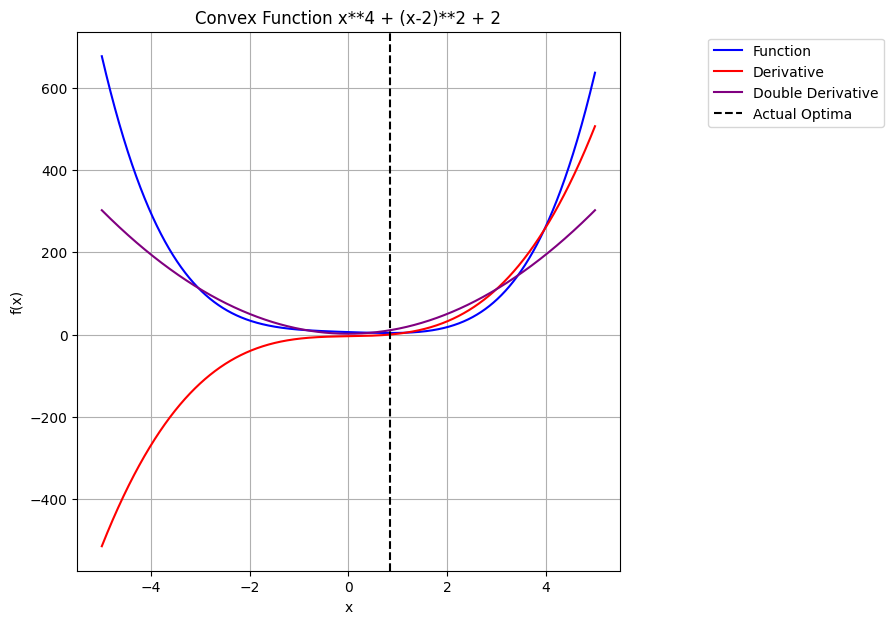

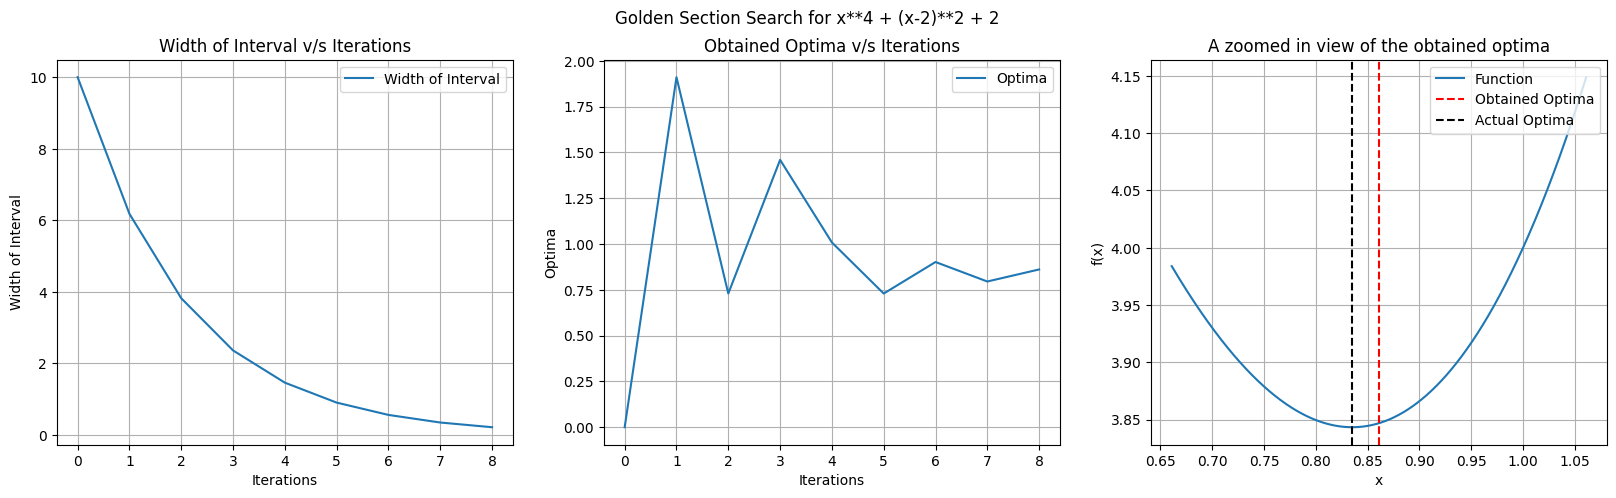

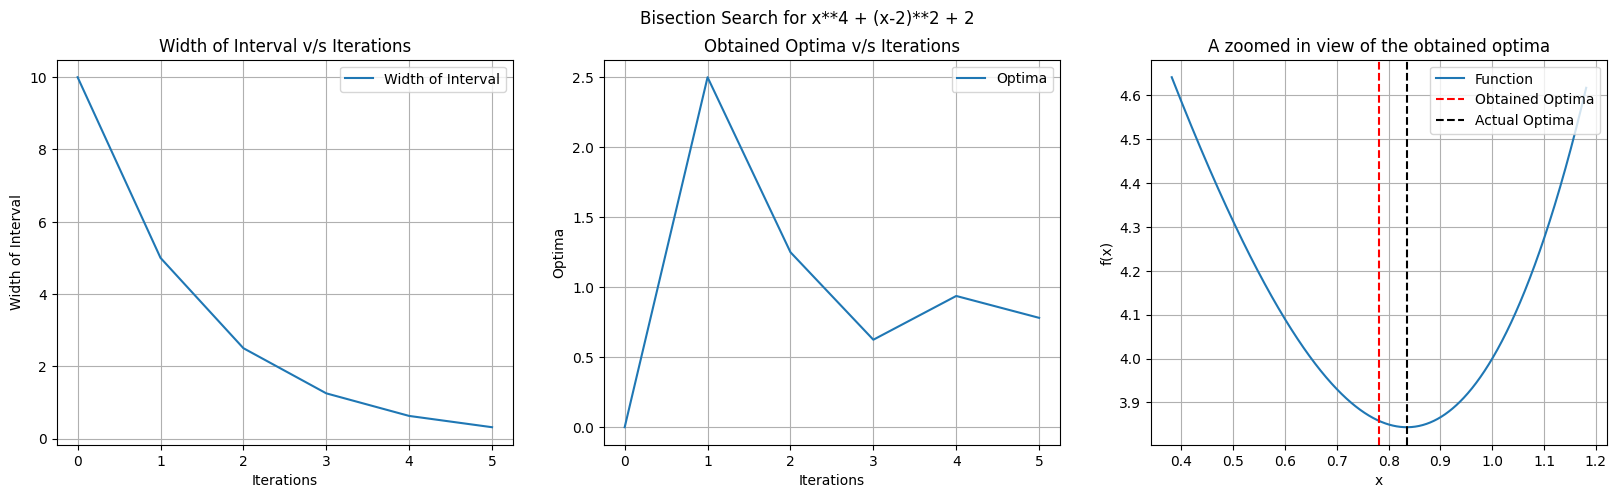

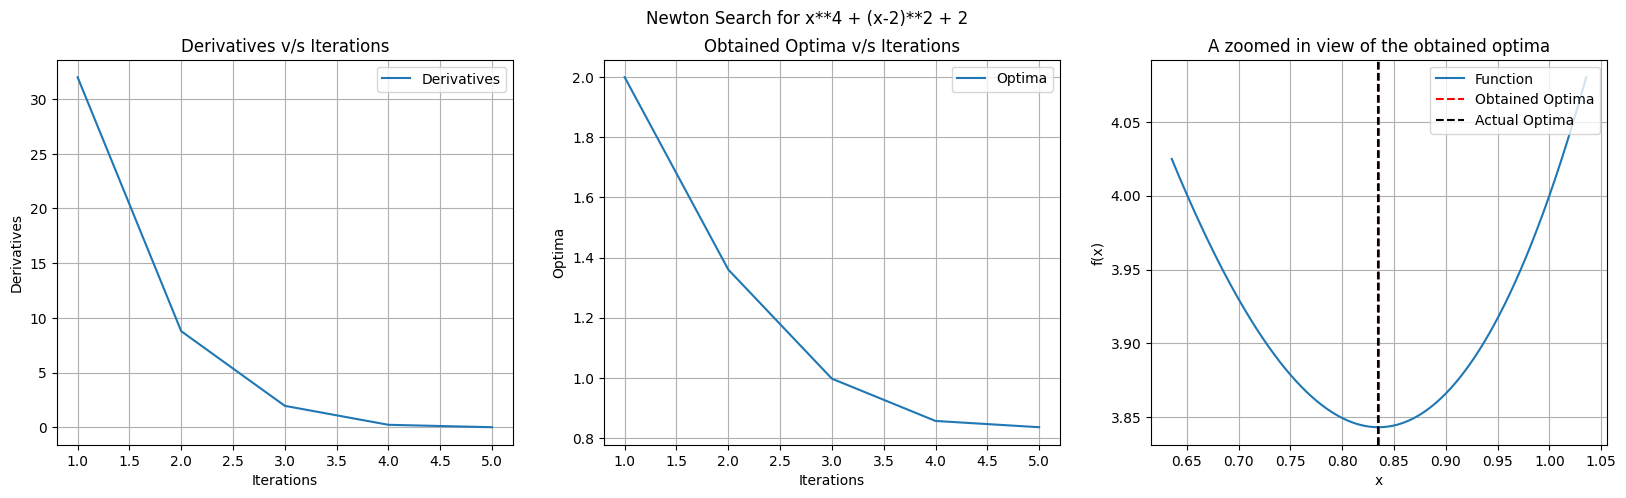

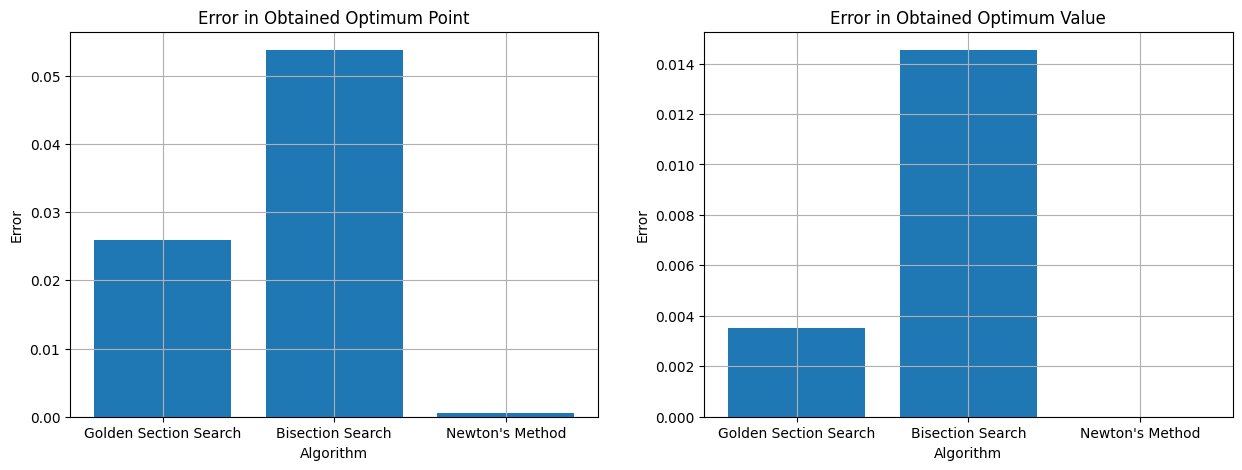

In [ ]:
def f1(x):
  return x**4 + (x-2)**2 + 2

def df1(x):
  return 4*x**3 + 2*(x-2)

def ddf1(x):
  return 12*x**2 + 2

true_opt = 0.835
true_opt_val = f1(true_opt)

# Plotting function
x=np.linspace(-5, 5, 10000)
plt.figure(figsize=(7, 7))
plt.plot(x, f1(x), color = "blue", label = "Function")
plt.plot(x, df1(x), color = "red", label = "Derivative")
plt.plot(x, ddf1(x), color = "purple", label = "Double Derivative")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.title("Convex Function x**4 + (x-2)**2 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.5, 1), loc = 'upper right')
plt.grid()
plt.show()

#############

opt, optimum, cache = goldenSectionSearch(f1, [-5, 5], 0.1, False, max_iterations=10000)

gs_opt_error = abs(opt-true_opt)
gs_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
width = cache["width"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations, width)
plt.title("Width of Interval v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Width of Interval")
plt.legend(["Width of Interval"])

plt.subplot(1, 3, 2)
plt.plot(iterations, optima)
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])


x=np.linspace(opt - 0.2, opt + 0.2, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f1(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Golden Section Search for x**4 + (x-2)**2 + 2")
plt.show()

#########################

opt, optimum, cache = bisectionSearch(f1, df1, [-5, 5], 0.1, False, max_iterations=10000)

bs_opt_error = abs(opt-true_opt)
bs_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
width = cache["width"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations, width)
plt.title("Width of Interval v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Width of Interval")
plt.legend(["Width of Interval"])

plt.subplot(1, 3, 2)
plt.plot(iterations, optima)
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])

x=np.linspace(opt - 0.4, opt + 0.4, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f1(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Bisection Search for x**4 + (x-2)**2 + 2")
plt.show()

######################

opt, optimum, cache = newtonMethod(f1, df1, ddf1, 0.01, interval=None, max_patience=5, max_iterations=10000)

nm_opt_error = abs(opt-true_opt)
nm_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
derivatives = cache["derivatives"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations[1:], derivatives[1:])
plt.title("Derivatives v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Derivatives")
plt.legend(["Derivatives"])

plt.subplot(1, 3, 2)
plt.plot(iterations[1:], optima[1:])
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])


x=np.linspace(opt - 0.2, opt + 0.2, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f1(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Newton Search for x**4 + (x-2)**2 + 2")
plt.show()


####################
x_labels = ["Golden Section Search", "Bisection Search", "Newton's Method"]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.grid()
plt.bar(x_labels, [gs_opt_error, bs_opt_error, nm_opt_error])
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.title("Error in Obtained Optimum Point")

plt.subplot(1, 2, 2)
plt.grid()
plt.bar(x_labels, [gs_val_error, bs_val_error, nm_val_error])
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.title("Error in Obtained Optimum Value")

plt.show()




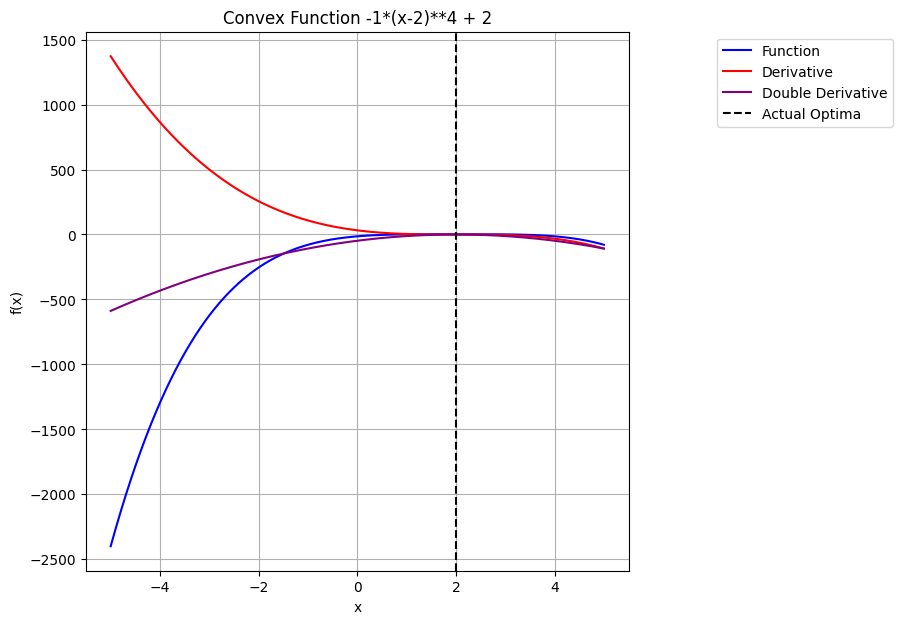

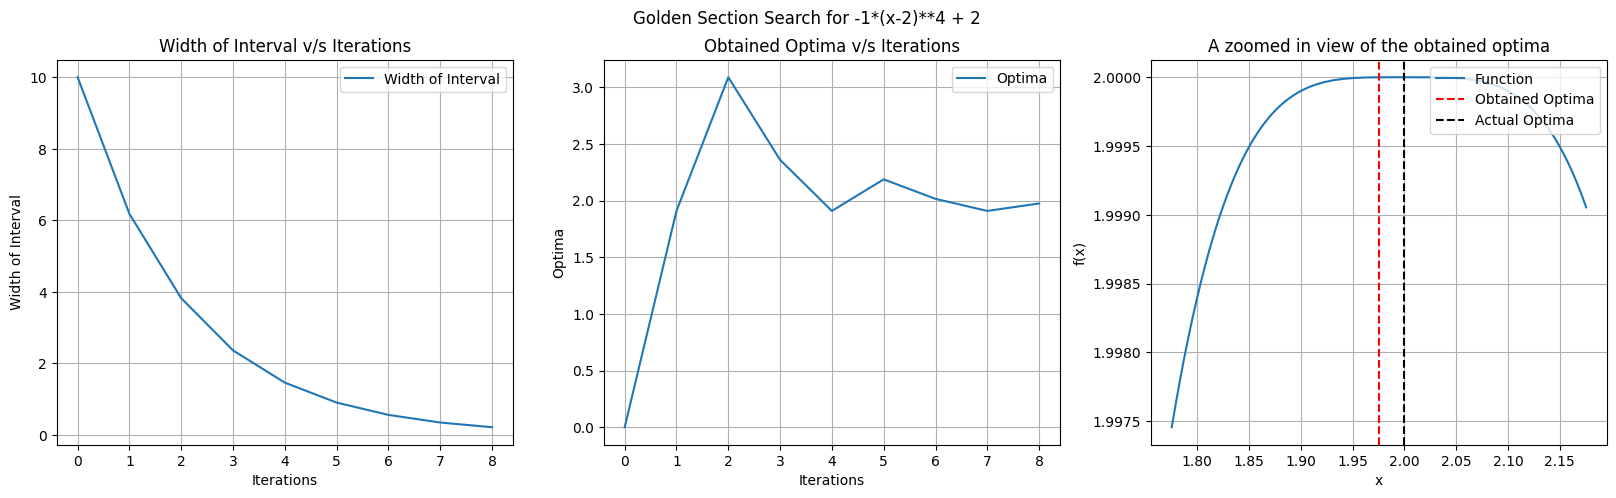

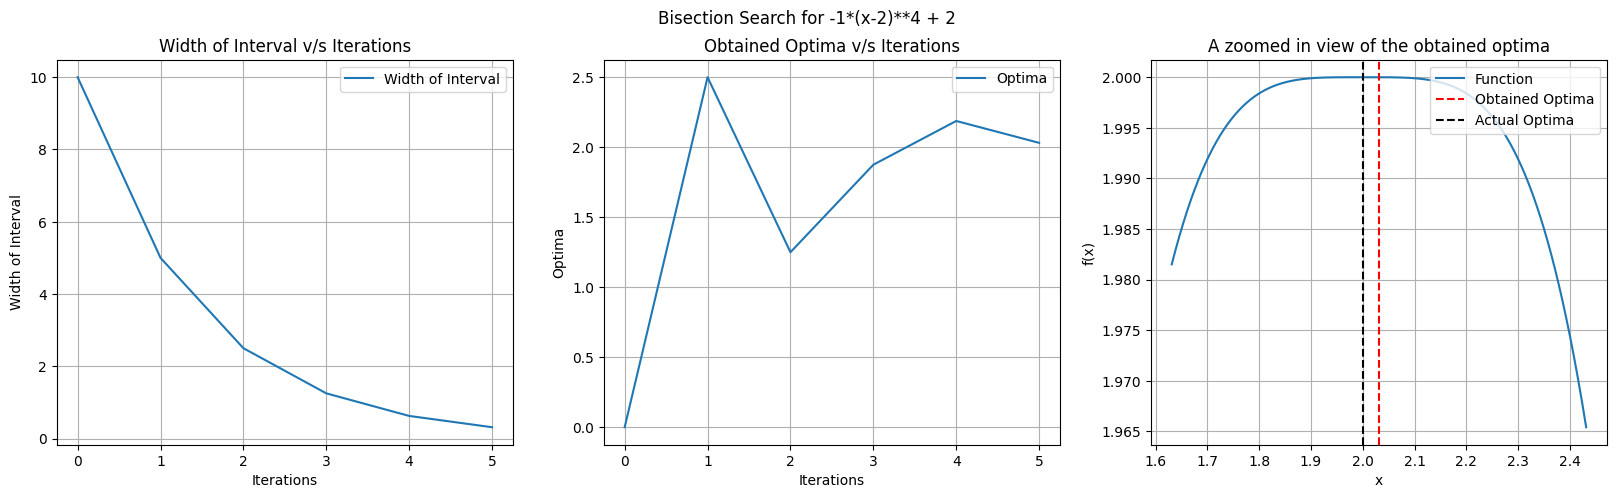

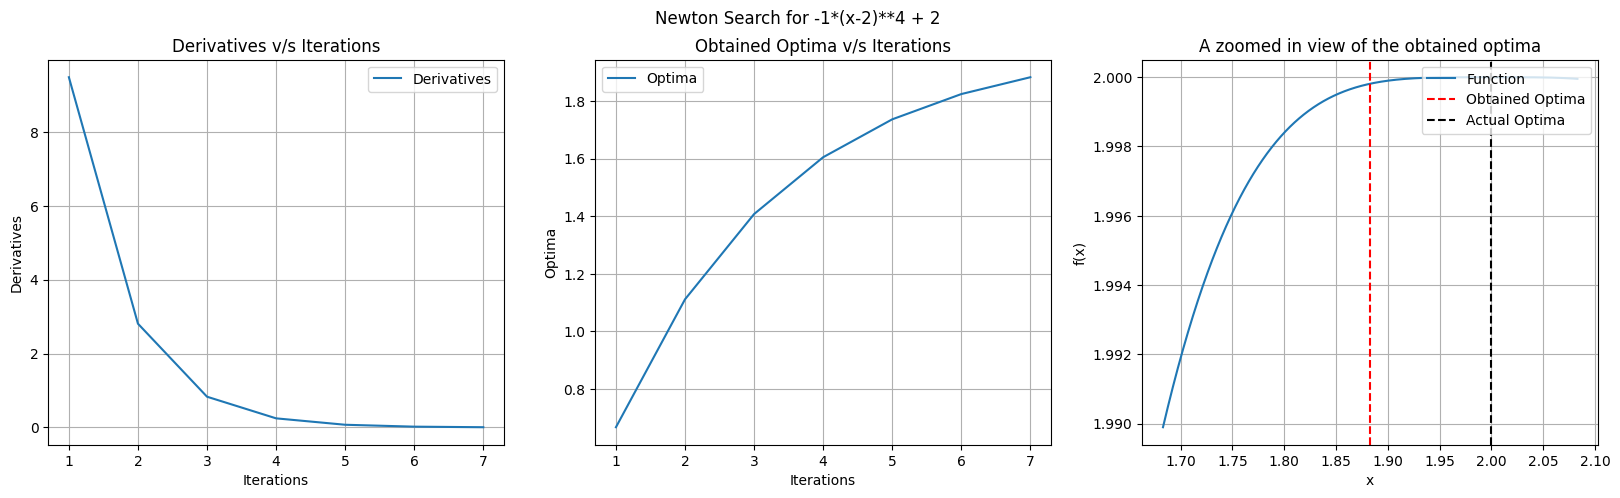

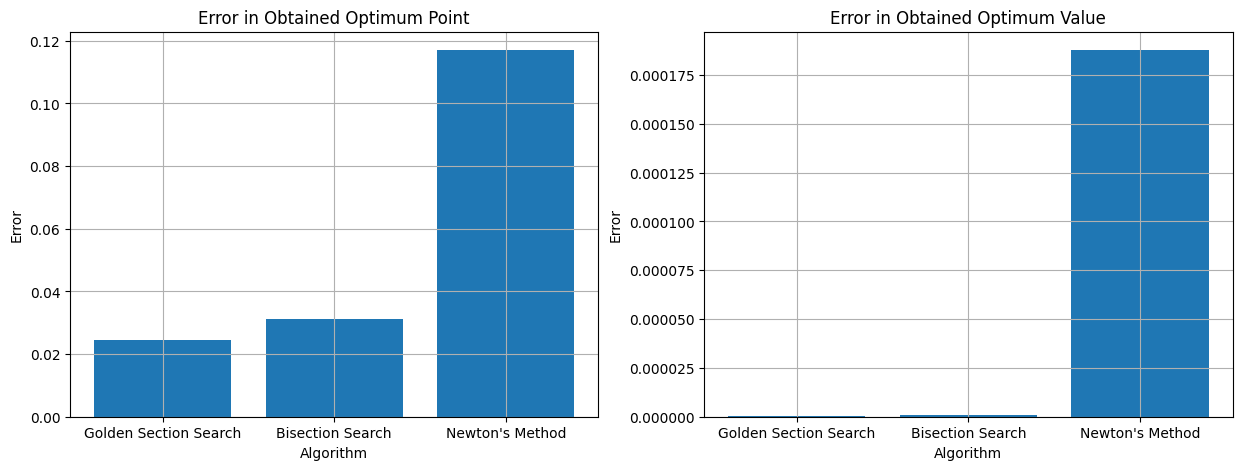

In [ ]:
def f2(x):
  return -1*(x-2)**4 + 2

def df2(x):
  return -4*(x-2)**3

def ddf2(x):
  return -12*(x-2)**2

true_opt = 2
true_opt_val = f2(true_opt)

# Plotting function
x=np.linspace(-5, 5, 10000)
plt.figure(figsize=(7, 7))
plt.plot(x, f2(x), color = "blue", label = "Function")
plt.plot(x, df2(x), color = "red", label = "Derivative")
plt.plot(x, ddf2(x), color = "purple", label = "Double Derivative")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.title("Convex Function -1*(x-2)**4 + 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.5, 1), loc = 'upper right')
plt.grid()
plt.show()

#############

opt, optimum, cache = goldenSectionSearch(f2, [-5, 5], 0.1, True, max_iterations=10000)

gs_opt_error = abs(opt-true_opt)
gs_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
width = cache["width"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations, width)
plt.title("Width of Interval v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Width of Interval")
plt.legend(["Width of Interval"])

plt.subplot(1, 3, 2)
plt.plot(iterations, optima)
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])


x=np.linspace(opt - 0.2, opt + 0.2, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f2(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Golden Section Search for -1*(x-2)**4 + 2")
plt.show()

#########################

opt, optimum, cache = bisectionSearch(f2, df2, [-5, 5], 0.1, True, max_iterations=10000)

bs_opt_error = abs(opt-true_opt)
bs_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
width = cache["width"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations, width)
plt.title("Width of Interval v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Width of Interval")
plt.legend(["Width of Interval"])

plt.subplot(1, 3, 2)
plt.plot(iterations, optima)
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])

x=np.linspace(opt - 0.4, opt + 0.4, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f2(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Bisection Search for -1*(x-2)**4 + 2")
plt.show()

######################

opt, optimum, cache = newtonMethod(f2, df2, ddf2, 0.01, interval=None, max_patience=5, max_iterations=10000)

nm_opt_error = abs(opt-true_opt)
nm_val_error = abs(optimum-true_opt_val)

iterations = cache["iterations"]
derivatives = cache["derivatives"]
optima = cache["optima"]

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(iterations[1:], derivatives[1:])
plt.title("Derivatives v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Derivatives")
plt.legend(["Derivatives"])

plt.subplot(1, 3, 2)
plt.plot(iterations[1:], optima[1:])
plt.title("Obtained Optima v/s Iterations")
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Optima")
plt.legend(["Optima"])


x=np.linspace(opt - 0.2, opt + 0.2, 1000)

plt.subplot(1, 3, 3)
plt.plot(x, f2(x), label = "Function")
plt.axvline(x = opt, color = 'red', linestyle='--', label = "Obtained Optima")
plt.axvline(x = true_opt, color = 'black', linestyle='--', label = "Actual Optima")
plt.legend(loc = 'upper right')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("A zoomed in view of the obtained optima")
plt.grid()

plt.suptitle("Newton Search for -1*(x-2)**4 + 2")
plt.show()


####################
x_labels = ["Golden Section Search", "Bisection Search", "Newton's Method"]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.grid()
plt.bar(x_labels, [gs_opt_error, bs_opt_error, nm_opt_error])
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.title("Error in Obtained Optimum Point")

plt.subplot(1, 2, 2)
plt.grid()
plt.bar(x_labels, [gs_val_error, bs_val_error, nm_val_error])
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.title("Error in Obtained Optimum Value")

plt.show()


